**Question no 1**

In [154]:
#Importing important Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
df=pd.read_csv(r'C:\Users\LENOVO\Desktop\dreamds\spenddata.csv') #Importing our training dataset
df.head() #Sneak peek of the dataset

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
0,1,1,2.0,NaN,1,5,1,57,34,1,...,1,0,0,0,1,0,0,0,5.0,NaN
1,2,1,2.0,NaN,1,4,1,57,34,2,...,0,0,0,0,0,0,1,0,NaN,NaN
2,3,1,2.0,NaN,1,5,1,57,42,2,...,0,0,0,0,0,0,0,0,3.0,NaN
3,4,1,2.0,NaN,1,6,1,57,34,2,...,0,0,0,0,1,0,1,0,5.0,NaN
4,5,1,2.0,NaN,1,8,1,22,1,1,...,0,0,0,0,0,0,0,0,5.0,NaN


In [156]:
df.info() #Information about data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Columns: 301 entries, Unnamed: 0 to t.158
dtypes: float64(134), int64(165), object(2)
memory usage: 42.2+ MB


*****DATA CLEANING/ DATA Pre-Processing*****

**Finding the Null values in our dataset**

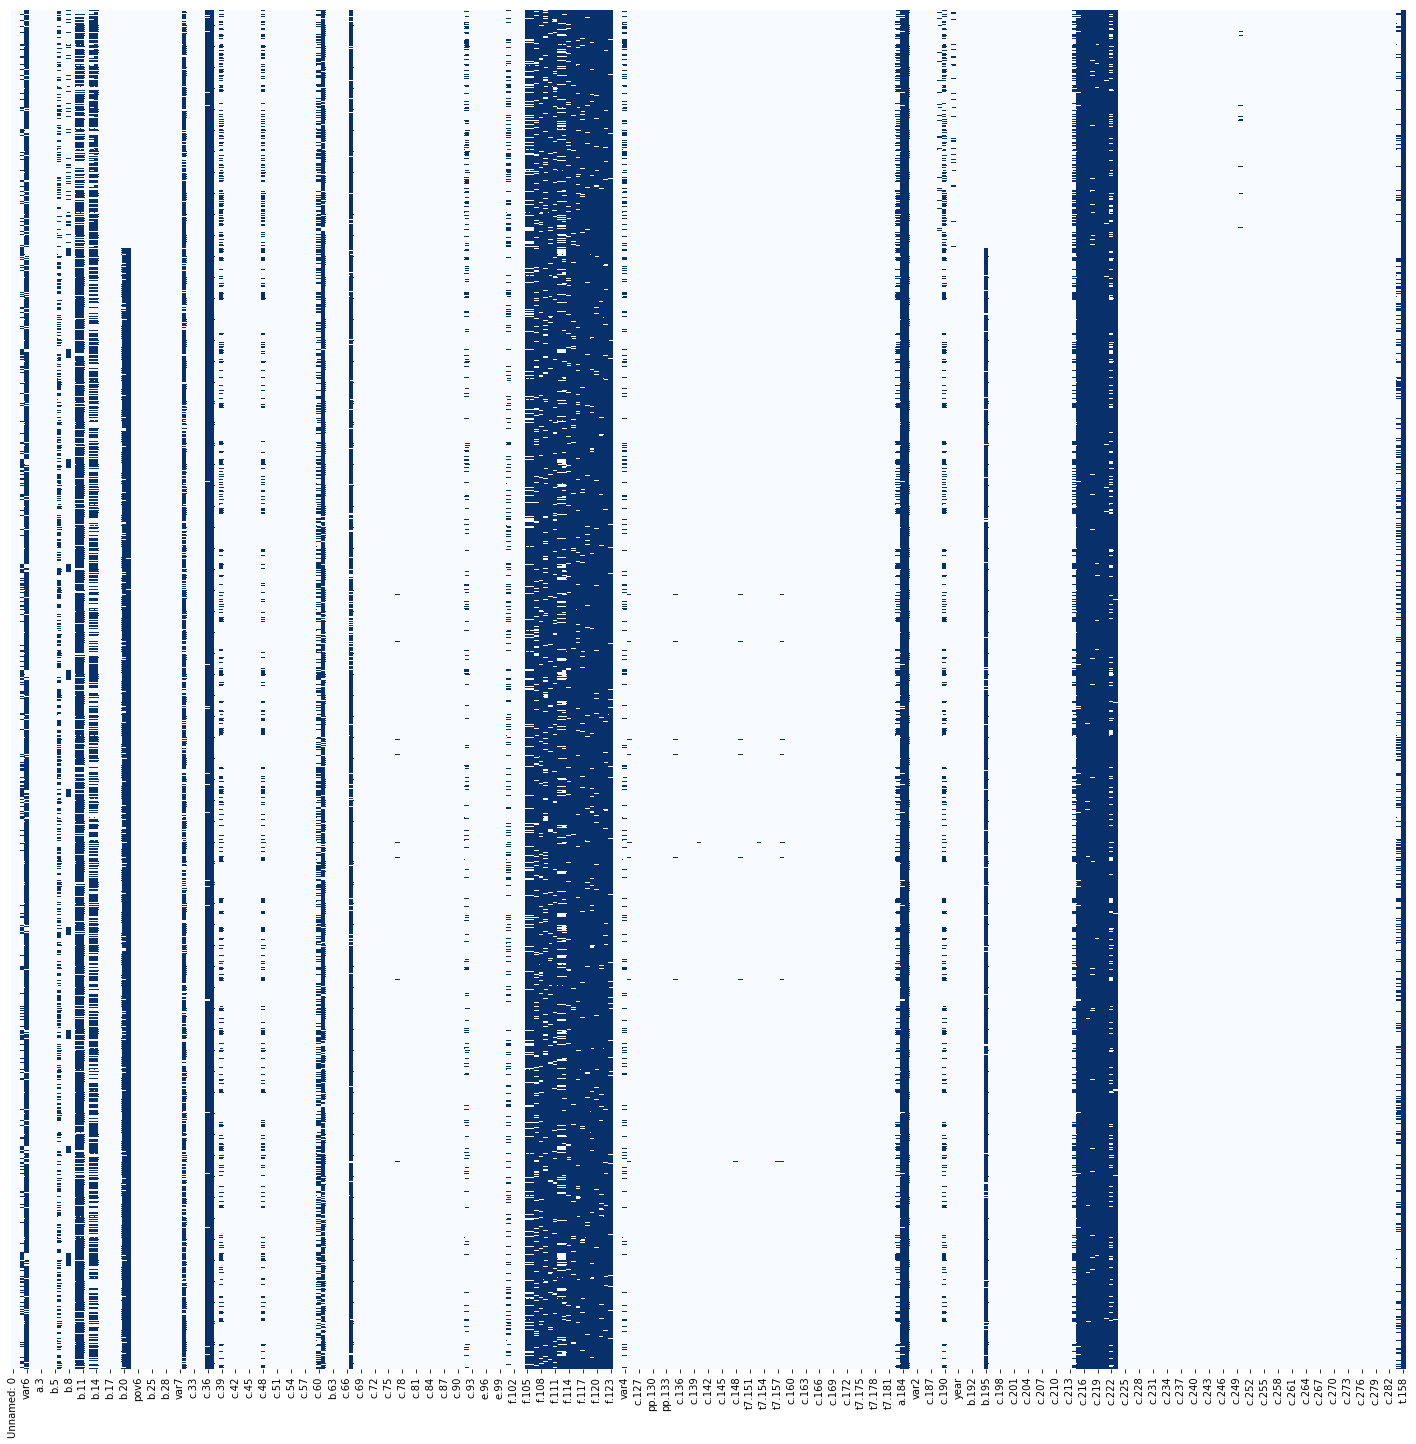

In [157]:
plt.figure(figsize=(25,25)) #selecting image size for better visuallisation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="Blues") #using seaborn library for the visuallisation of the missing values in our dataset.

In [158]:
def features_with_missing_values(df): #A function to print the missing null values
    for i in df.columns:
        if df[i].isna().sum()>0:
            print('The Feature ',i,' has '+ str(df[i].isna().sum()) + ' missing values')
            
features_with_missing_values(df)

The Feature  var8  has 4009 missing values
The Feature  var6  has 16480 missing values
The Feature  b.6  has 8079 missing values
The Feature  b.8  has 1773 missing values
The Feature  b.10  has 16007 missing values
The Feature  b.11  has 16007 missing values
The Feature  b.13  has 11683 missing values
The Feature  b.14  has 11920 missing values
The Feature  b.20  has 14234 missing values
The Feature  b.21  has 15098 missing values
The Feature  c.31  has 15225 missing values
The Feature  c.36  has 18148 missing values
The Feature  c.37  has 18372 missing values
The Feature  c.39  has 5359 missing values
The Feature  c.48  has 4475 missing values
The Feature  c.60  has 7984 missing values
The Feature  c.61  has 16770 missing values
The Feature  c.67  has 17436 missing values
The Feature  c.77  has 78 missing values
The Feature  c.92  has 3090 missing values
The Feature  e.101  has 4241 missing values
The Feature  f.105  has 16159 missing values
The Feature  f.106  has 16160 missing value

While I was going through the dataset,I observed that there were many zeros also in the dataset so lets visuallize that 
also

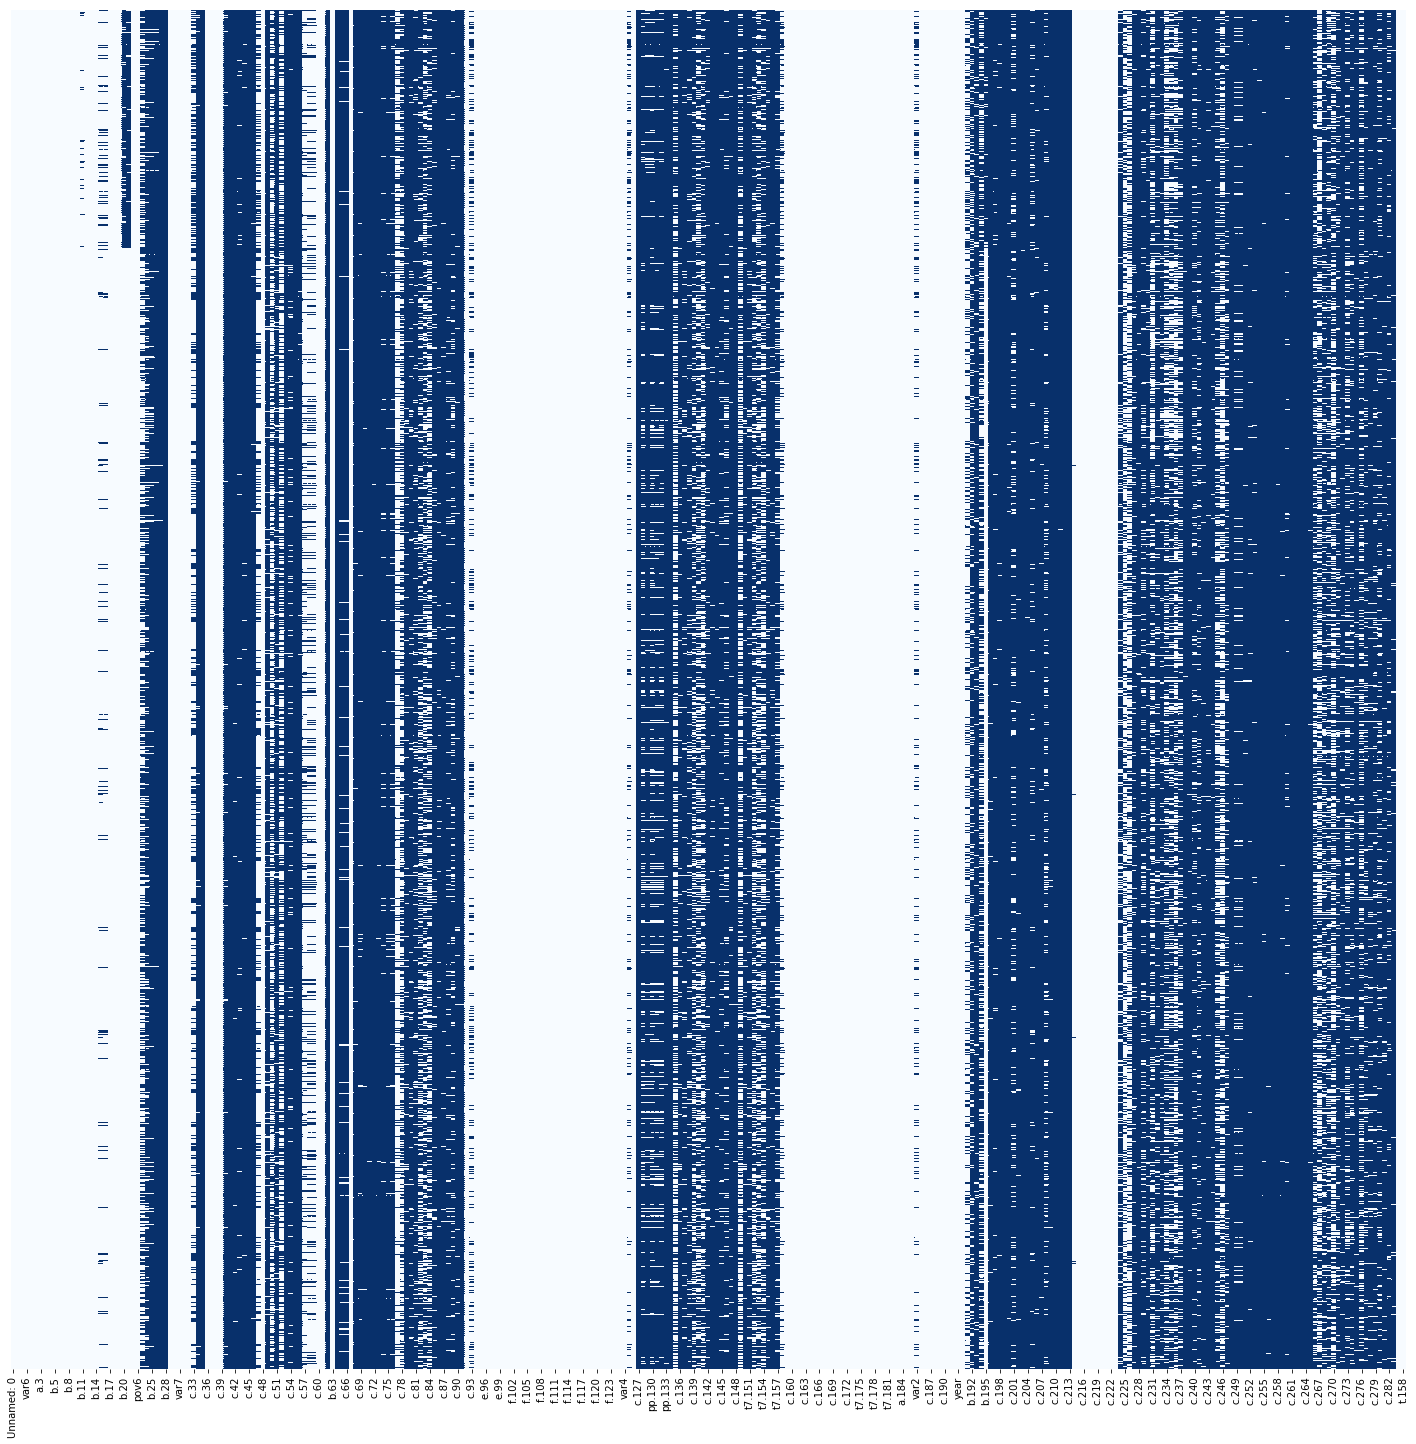

In [159]:
plt.figure(figsize=(25,25)) 
sns.heatmap(df.isin([0]),yticklabels=False,cbar=False,cmap="Blues") #Finding the number of zeroes in a specific column

In [160]:
def features_with_zero_values(df): #Function to print zero value present in column
    for i in df.columns:
        if df[i].isin([0]).sum()>0:
            print('The Feature ',i,' has '+ str(df[i].isin([0]).sum()) + ' zero values')
            
features_with_zero_values(df)

The Feature  b.11  has 257 zero values
The Feature  b.15  has 1370 zero values
The Feature  b.16  has 1276 zero values
The Feature  b.20  has 2968 zero values
The Feature  b.21  has 3083 zero values
The Feature  b.23  has 9263 zero values
The Feature  b.24  has 15599 zero values
The Feature  b.25  has 17678 zero values
The Feature  b.26  has 18263 zero values
The Feature  b.27  has 18363 zero values
The Feature  b.28  has 18378 zero values
The Feature  c.33  has 5624 zero values
The Feature  c.34  has 18162 zero values
The Feature  c.35  has 18374 zero values
The Feature  c.40  has 18148 zero values
The Feature  c.41  has 18372 zero values
The Feature  c.42  has 18275 zero values
The Feature  c.43  has 18106 zero values
The Feature  c.44  has 18326 zero values
The Feature  c.45  has 18378 zero values
The Feature  c.46  has 18358 zero values
The Feature  c.47  has 4912 zero values
The Feature  c.49  has 17608 zero values
The Feature  c.50  has 6857 zero values
The Feature  c.51  has 177

Now we will drop those features which are having more than 30% of the value as NULL Values or Zero values,
but before droping a feature , I would like to save a feature "var6" as from intution I think will be an important feature
for the classification.

In [161]:
var6=df['var6'] #Assigning and saving theses feature before performing a column drop operation on the dataset

In [162]:
df.drop(df.columns[df.apply(lambda col: col.isnull().sum() > 5000)], axis=1,inplace=True) #Dropping the null value columns which are having more than 30% of the value as NaN
df.drop(df.columns[df.apply(lambda col: col.isin([0]).sum() > 5000)], axis=1,inplace=True)#Dropping the zero value columns which are having more than 30% of the value as NaN

Now take a look at our new dataset
        
        

In [163]:
df.head()

,Unnamed: 0,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.7,...,totshopping.rep,var1,c.187,f.188,c.189,var0,var9,year,respondent.id,f.284
0,1,1,2.0,1,5,1,57,34,1,1,...,101.70,1,2,3,1.0,1,Mono,2016,2016_1,5.0
1,2,1,2.0,1,4,1,57,34,2,1,...,26.70,1,2,1,7.0,14,Mono,2016,2016_2,NaN
2,3,1,2.0,1,5,1,57,42,2,1,...,4074.75,1,2,1,7.0,14,Multi,2016,2016_3,3.0
3,4,1,2.0,1,6,1,57,34,2,1,...,276.70,1,2,1,7.0,14,Mono,2016,2016_4,5.0
4,5,1,2.0,1,8,1,22,1,1,1,...,2070.75,1,2,1,1.0,3,Multi,2016,2016_5,5.0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Data columns (total 87 columns):
Unnamed: 0         18379 non-null int64
month              18379 non-null int64
var8               14370 non-null float64
a.1                18379 non-null int64
a.2                18379 non-null int64
a.3                18379 non-null int64
a.4                18379 non-null int64
var5               18379 non-null int64
b.5                18379 non-null int64
b.7                18379 non-null int64
b.8                16606 non-null float64
b.9                18379 non-null int64
b.12               18379 non-null int64
b.15               18379 non-null int64
b.16               18379 non-null int64
b.17               18379 non-null float64
b.18               18379 non-null float64
b.19               18379 non-null int64
b.22               18379 non-null int64
pov6               18379 non-null int64
c.29               18379 non-null int64
c.30               18379 non-null int64
var

Now lets drop some more feature which will have no effects on our classification result such as "respondant_id"
and "year"

In [165]:
df.drop(["var9","year","respondent.id"],axis=1,inplace=True)


In [166]:
df.head()

,Unnamed: 0,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.7,...,t7.182,a.186,var2,totshopping.rep,var1,c.187,f.188,c.189,var0,f.284
0,1,1,2.0,1,5,1,57,34,1,1,...,1,26.70,75.0,101.70,1,2,3,1.0,1,5.0
1,2,1,2.0,1,4,1,57,34,2,1,...,2,26.70,0.0,26.70,1,2,1,7.0,14,NaN
2,3,1,2.0,1,5,1,57,42,2,1,...,1,74.75,4000.0,4074.75,1,2,1,7.0,14,3.0
3,4,1,2.0,1,6,1,57,34,2,1,...,1,26.70,250.0,276.70,1,2,1,7.0,14,5.0
4,5,1,2.0,1,8,1,22,1,1,1,...,1,70.75,2000.0,2070.75,1,2,1,1.0,3,5.0


In [167]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Data columns (total 84 columns):
Unnamed: 0         18379 non-null int64
month              18379 non-null int64
var8               14370 non-null float64
a.1                18379 non-null int64
a.2                18379 non-null int64
a.3                18379 non-null int64
a.4                18379 non-null int64
var5               18379 non-null int64
b.5                18379 non-null int64
b.7                18379 non-null int64
b.8                16606 non-null float64
b.9                18379 non-null int64
b.12               18379 non-null int64
b.15               18379 non-null int64
b.16               18379 non-null int64
b.17               18379 non-null float64
b.18               18379 non-null float64
b.19               18379 non-null int64
b.22               18379 non-null int64
pov6               18379 non-null int64
c.29               18379 non-null int64
c.30               18379 non-null int64
var

Now lets concatnate our "var6"feature
        

In [168]:
df=pd.concat([df,var6],axis=1)

In [169]:
df.head()
    

,Unnamed: 0,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.7,...,a.186,var2,totshopping.rep,var1,c.187,f.188,c.189,var0,f.284,var6
0,1,1,2.0,1,5,1,57,34,1,1,...,26.70,75.0,101.70,1,2,3,1.0,1,5.0,NaN
1,2,1,2.0,1,4,1,57,34,2,1,...,26.70,0.0,26.70,1,2,1,7.0,14,NaN,NaN
2,3,1,2.0,1,5,1,57,42,2,1,...,74.75,4000.0,4074.75,1,2,1,7.0,14,3.0,NaN
3,4,1,2.0,1,6,1,57,34,2,1,...,26.70,250.0,276.70,1,2,1,7.0,14,5.0,NaN
4,5,1,2.0,1,8,1,22,1,1,1,...,70.75,2000.0,2070.75,1,2,1,1.0,3,5.0,NaN


In [170]:
features_raw=df
features = pd.get_dummies(features_raw)

Now replace every NaN value with zero

In [171]:
df=df.fillna(0)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Data columns (total 85 columns):
Unnamed: 0         18379 non-null int64
month              18379 non-null int64
var8               18379 non-null float64
a.1                18379 non-null int64
a.2                18379 non-null int64
a.3                18379 non-null int64
a.4                18379 non-null int64
var5               18379 non-null int64
b.5                18379 non-null int64
b.7                18379 non-null int64
b.8                18379 non-null float64
b.9                18379 non-null int64
b.12               18379 non-null int64
b.15               18379 non-null int64
b.16               18379 non-null int64
b.17               18379 non-null float64
b.18               18379 non-null float64
b.19               18379 non-null int64
b.22               18379 non-null int64
pov6               18379 non-null int64
c.29               18379 non-null int64
c.30               18379 non-null int64
var

Corelation between our dataset

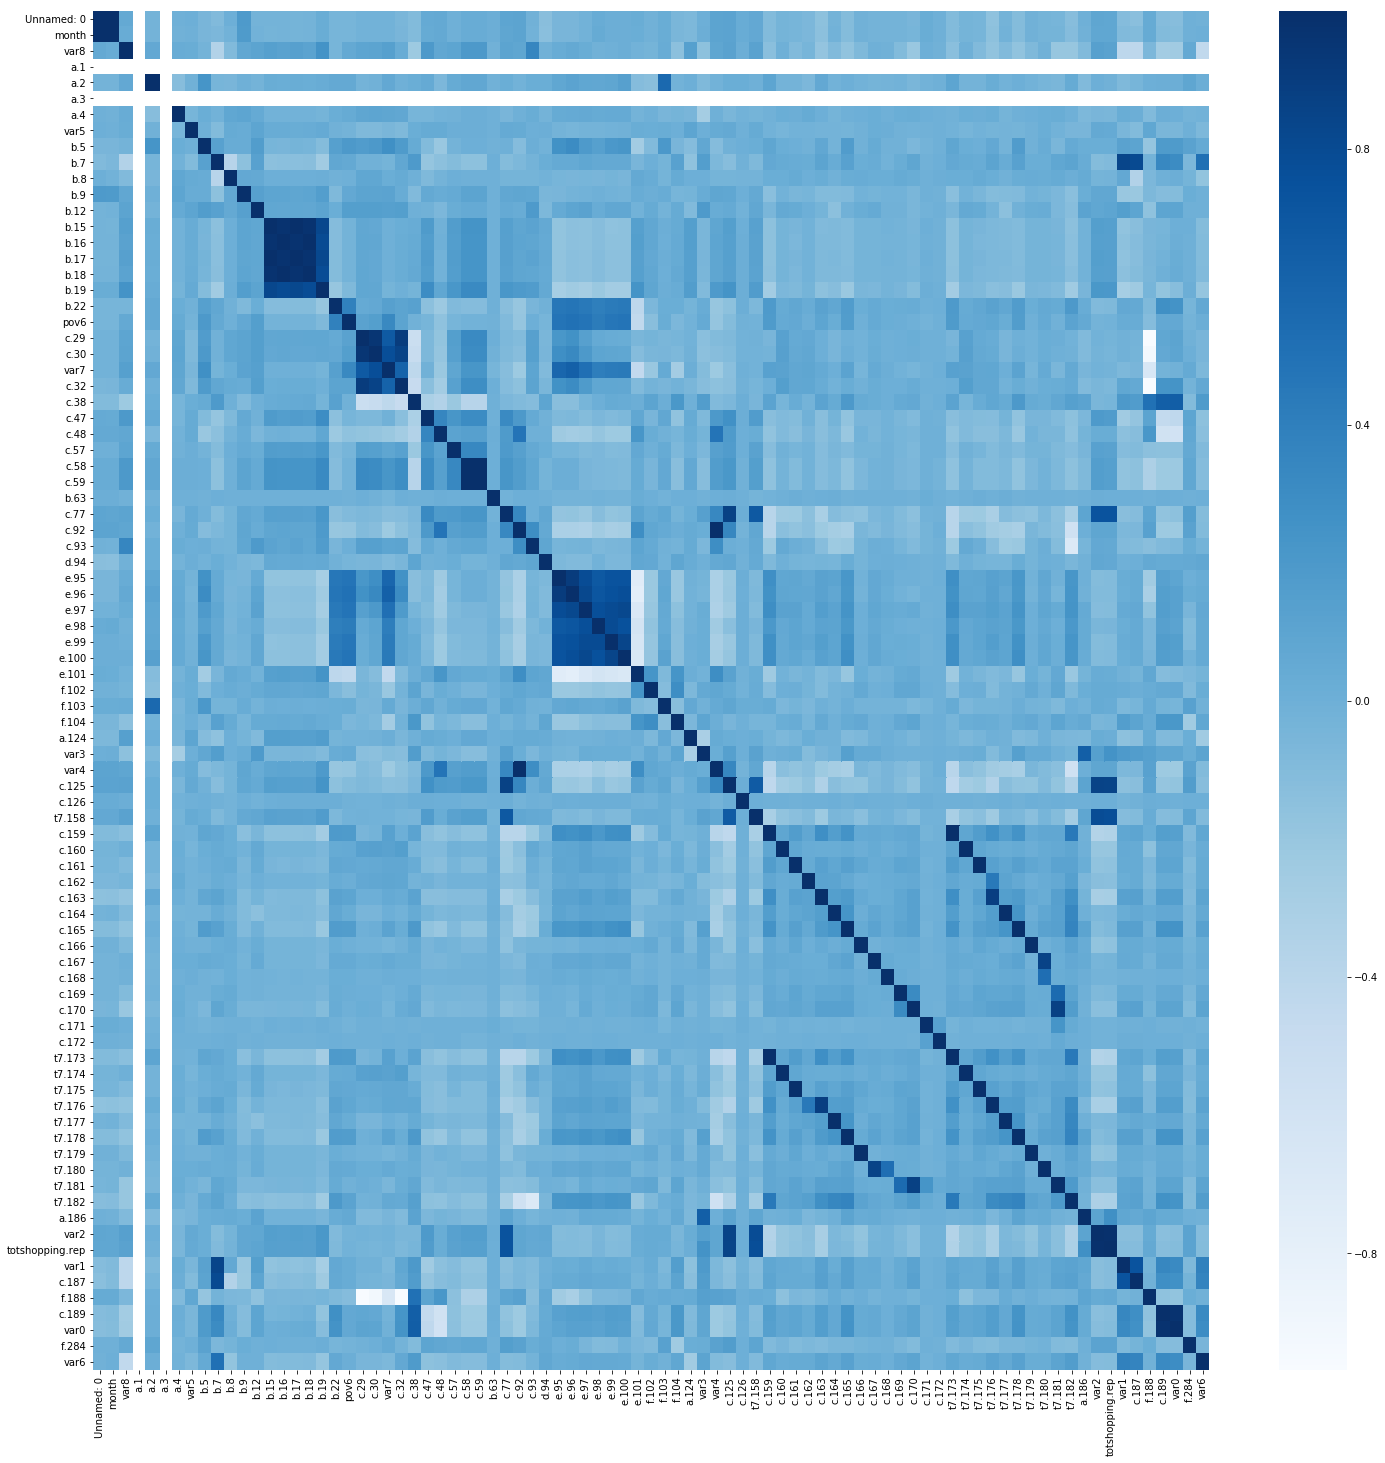

In [173]:
corrmap=df.corr()
plt.figure(figsize=(25,25))
top=corrmap.index
graph=sns.heatmap(df[top].corr(),cmap="Blues")

Model Building

In [174]:
# Our independent feature is pov6
#Multi output regression as there are two output features
x = df.drop(['pov6'],axis=1)
y = df[['pov6']]

In [175]:
x.head()

,Unnamed: 0,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.7,...,a.186,var2,totshopping.rep,var1,c.187,f.188,c.189,var0,f.284,var6
0,1,1,2.0,1,5,1,57,34,1,1,...,26.70,75.0,101.70,1,2,3,1.0,1,5.0,0.0
1,2,1,2.0,1,4,1,57,34,2,1,...,26.70,0.0,26.70,1,2,1,7.0,14,0.0,0.0
2,3,1,2.0,1,5,1,57,42,2,1,...,74.75,4000.0,4074.75,1,2,1,7.0,14,3.0,0.0
3,4,1,2.0,1,6,1,57,34,2,1,...,26.70,250.0,276.70,1,2,1,7.0,14,5.0,0.0
4,5,1,2.0,1,8,1,22,1,1,1,...,70.75,2000.0,2070.75,1,2,1,1.0,3,5.0,0.0


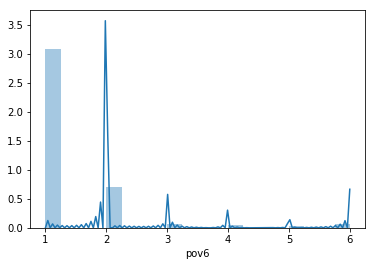

In [176]:
sns.distplot(df["pov6"],bins=20)

In [177]:
#importing the sklearn library for train test data split
from sklearn import preprocessing
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.20)

In [178]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
dt = DecisionTreeClassifier(criterion= 'gini', random_state=1)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)
# Fit dt to the training set
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [179]:
# Predict test set labels
y_pred = dt.predict(x_test)


In [180]:
# Evaluate test-set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))


Test set accuracy: 0.95


In [181]:
# Import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf = RandomForestClassifier(criterion= 'gini', random_state=1)


In [182]:
# Fit clf to the training set
clf.fit(x_train,y_train)

C:\fffff\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\fffff\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [183]:
# Predict test set labels
y_pred1 = clf.predict(x_test)

In [184]:
# Evaluate test-set accuracy
acc = accuracy_score(y_test, y_pred1)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.94


Now Predicting our test data using our best fit model based on the accuracy score

In [185]:
test_df=pd.read_csv(r'C:\Users\LENOVO\Desktop\dreamds\TestData.csv') #Importing our Test dataset

Now again same steps to clean the data

In [190]:
for column in df.columns:
    if column not in test_df.columns:
        test_df[column] = 0

for column in test_df.columns:
    if column not in df.columns:
        test_df.drop([column], axis=1, inplace=True)

In [191]:

test_df.head()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,...,t7.182,a.186,var2,totshopping.rep,var1,c.187,f.188,c.189,var0,f.284
0,9,1,1.0,NaN,1,11,1,47,8,2,...,2,8.51,0.0,NaN,1,2,1,7.0,14,3.0
1,15,1,2.0,NaN,1,11,1,65,27,1,...,1,49.55,20.0,NaN,1,2,2,1.0,3,3.0
2,16,1,2.0,NaN,1,6,1,65,27,2,...,1,49.55,60.0,NaN,1,2,1,NaN,5,3.0
3,24,1,1.0,NaN,1,3,1,3,2,1,...,2,62.34,0.0,NaN,1,1,1,NaN,4,NaN
4,32,1,1.0,NaN,1,5,1,83,3,1,...,2,92.38,0.0,NaN,2,2,1,NaN,2,NaN


In [193]:
test_df.drop(['pov6'],axis=1 ,inplace=True)

In [194]:
test_df.head()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,...,t7.182,a.186,var2,totshopping.rep,var1,c.187,f.188,c.189,var0,f.284
0,9,1,1.0,NaN,1,11,1,47,8,2,...,2,8.51,0.0,NaN,1,2,1,7.0,14,3.0
1,15,1,2.0,NaN,1,11,1,65,27,1,...,1,49.55,20.0,NaN,1,2,2,1.0,3,3.0
2,16,1,2.0,NaN,1,6,1,65,27,2,...,1,49.55,60.0,NaN,1,2,1,NaN,5,3.0
3,24,1,1.0,NaN,1,3,1,3,2,1,...,2,62.34,0.0,NaN,1,1,1,NaN,4,NaN
4,32,1,1.0,NaN,1,5,1,83,3,1,...,2,92.38,0.0,NaN,2,2,1,NaN,2,NaN


In [195]:
test_df=test_df.fillna(0)

In [196]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Data columns (total 84 columns):
Unnamed: 0         4595 non-null int64
month              4595 non-null int64
var8               4595 non-null float64
var6               4595 non-null float64
a.1                4595 non-null int64
a.2                4595 non-null int64
a.3                4595 non-null int64
a.4                4595 non-null int64
var5               4595 non-null int64
b.5                4595 non-null int64
b.7                4595 non-null int64
b.8                4595 non-null float64
b.9                4595 non-null int64
b.12               4595 non-null int64
b.15               4595 non-null int64
b.16               4595 non-null int64
b.17               4595 non-null float64
b.18               4595 non-null float64
b.19               4595 non-null int64
b.22               4595 non-null int64
c.29               4595 non-null int64
c.30               4595 non-null int64
var7               4595 n

In [197]:
y_pred2 = dt.predict(test_df)

In [200]:
test_df['pov6']=pd.Series(y_pred2)

In [202]:
test_df.head()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,...,a.186,var2,totshopping.rep,var1,c.187,f.188,c.189,var0,f.284,pov6
0,9,1,1.0,0.0,1,11,1,47,8,2,...,8.51,0.0,0.0,1,2,1,7.0,14,3.0,1
1,15,1,2.0,0.0,1,11,1,65,27,1,...,49.55,20.0,0.0,1,2,2,1.0,3,3.0,1
2,16,1,2.0,0.0,1,6,1,65,27,2,...,49.55,60.0,0.0,1,2,1,0.0,5,3.0,1
3,24,1,1.0,0.0,1,3,1,3,2,1,...,62.34,0.0,0.0,1,1,1,0.0,4,0.0,1
4,32,1,1.0,0.0,1,5,1,83,3,1,...,92.38,0.0,0.0,2,2,1,0.0,2,0.0,1


In [204]:
test_df.to_csv(r'C:\Users\LENOVO\Desktop\dreamds\output_q_1.csv')